In [1]:
cd ../

/Users/pavanchaggar/Documents/Optimisation


In [2]:
from PAID.EulerMethod import euler
from PAID.data.generator import DataGenerator
from tests.exact_models.models import logistic_growth_dimensionless 
import numpy as np
import matplotlib.pyplot as plt
import math

<function matplotlib.pyplot.show(*args, **kw)>

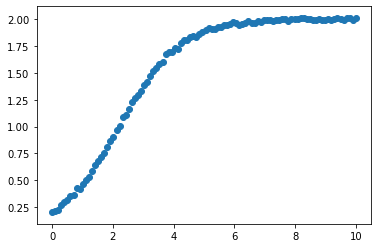

In [3]:
def solution(x_0, Lambda,times=10, samples=100):
    
    data_time = np.linspace(0, times, samples)
    
    exact_solution = logistic_growth_dimensionless(times=data_time, x_0=x_0, Lambda=Lambda)

    return exact_solution

def noise_Data(exact_solution, scale=0.01, times=10,samples=100):
    gen = DataGenerator()
    data_time =     data_time = np.linspace(0, times, samples)
    noise_data = exact_solution + gen.generate_data(exact_solution, scale)
    
    noisey_Data = np.vstack((noise_data,data_time))
    #noisey_Data = np.vstack(tup=(data_time, noise_Data))
    
    return noisey_Data

sol = solution(0.1,1)
nd = noise_Data(sol)
plt.scatter(nd[1,:],nd[0,:])
plt.show

In [4]:
def log_Likelihood_ratio(theta, theta_new,noise_data,sigma=0.05, sd=0.01):
    
    x_0 = theta[0]
    Lambda = theta[1]
    
    x_0_new = theta_new[0]
    Lambda_new = theta_new[1]
    
    exact_model = solution(x_0=x_0, Lambda=Lambda)
    exact_model_new = solution(x_0= x_0_new, Lambda =Lambda_new)
    
    nD = noise_data 
    
    log_posterior_ratio = -np.sum((exact_model_new - nD)**2)/(2 * sigma ** 2) + np.sum((exact_model - nD)**2)/(2*(sigma**2))
   
    return log_posterior_ratio

In [5]:
transition = lambda theta, cov: np.random.multivariate_normal(theta,cov)


In [6]:
def acceptance_criteria(log_Ratio):
    if log_Ratio >= 0:
        return True
    else:
        x = np.random.uniform(0,1)
        if np.log(x) < log_Ratio: 
            return True
        else:
            return False
        

In [7]:
def met_hast_estimation(x_0, Lambda, noise_Data, samples):
    
    theta = [x_0, Lambda]
    cov = np.eye(len(theta)) * 0.01 ** 2
    samples = samples
    accepted = np.empty(shape=(samples,2))
    nd = noise_Data
    #prior = np.random.multivariate_normal(parameters, covar, size)
    accepted_params = 0
    for i in range(samples):
        theta_new = transition(theta, cov)
        log_ratio = log_Likelihood_ratio(theta,theta_new,nd)
        if acceptance_criteria(log_ratio):
            theta = theta_new
            accepted[accepted_params,:] = theta_new
            accepted_params += 1
            print(theta_new)
             
    
    return accepted[:accepted_params]
        

In [8]:
a = met_hast_estimation(x_0 = 0.1, Lambda = 1, noise_Data = nd, samples = 5000)

[0.10617428 1.02091857]
[0.11842795 1.01933639]
[0.14210083 1.00724623]
[0.15543288 1.00855366]
[0.16671311 1.00479038]
[0.17095737 1.00938376]
[0.17108502 1.01347362]
[0.17550008 1.01379641]
[0.18567633 1.01352467]
[0.19620311 1.00867552]
[0.20890228 1.0228978 ]
[0.20914942 1.03108543]
[0.22677198 1.03003492]
[0.23751731 1.02168556]
[0.24598081 1.02212474]
[0.24759403 1.02451459]
[0.25885817 1.04108884]
[0.26009786 1.04864318]
[0.26127932 1.06097023]
[0.25715558 1.07952832]
[0.26041691 1.07843345]
[0.27319872 1.0822914 ]
[0.26998734 1.08882623]
[0.26972958 1.09497059]
[0.26869097 1.09906999]
[0.28369838 1.10653017]
[0.2747751  1.12508585]
[0.28023237 1.12680273]
[0.28134952 1.1328109 ]
[0.28724455 1.14445909]
[0.30094157 1.13954279]
[0.31713786 1.13131619]
[0.31831476 1.13139202]
[0.31899895 1.13077088]
[0.33313282 1.12731273]
[0.34413549 1.13247006]
[0.35498678 1.13545581]
[0.35919512 1.12983641]
[0.36754661 1.14036145]
[0.37343615 1.14929329]
[0.36820612 1.15690324]
[0.37657362 1.15

[0.11148616 3.55900224]
[0.1049286  3.56011716]
[0.09900731 3.54711083]
[0.09630888 3.54685306]
[0.10767527 3.54294949]
[0.10882089 3.5565653 ]
[0.105981   3.57053521]
[0.10254529 3.5812483 ]
[0.10266999 3.59757851]
[0.10064739 3.60303232]
[0.09936746 3.59559502]
[0.0940962  3.60149252]
[0.09380156 3.5894891 ]
[0.10575402 3.59667176]
[0.10488761 3.59694828]
[0.10312079 3.59277508]
[0.10175666 3.60201436]
[0.10094946 3.60618019]
[0.09699746 3.6021119 ]
[0.09735144 3.58619313]
[0.10427649 3.59902373]
[0.10025509 3.60410511]
[0.09672513 3.61056562]
[0.09677342 3.62723013]
[0.10090837 3.6250698 ]
[0.1021452  3.61741762]
[0.10330643 3.6138351 ]
[0.09494584 3.61341858]
[0.0885664  3.61605512]
[0.10660723 3.5996665 ]
[0.10562524 3.61640106]
[0.0969402  3.61457871]
[0.09699219 3.61490429]
[0.09529417 3.62371511]
[0.09749625 3.63197835]
[0.09376625 3.61480993]
[0.09228536 3.62830212]
[0.0916091  3.63970699]
[0.08955486 3.65697701]
[0.09438137 3.65191352]
[0.09947593 3.65368153]
[0.0927977 3.661

[0.0877295  3.78248378]
[0.09165637 3.78062774]
[0.08094521 3.78422824]
[0.0849632  3.78325291]
[0.09248153 3.79026575]
[0.08515975 3.77893783]
[0.09024937 3.78313595]
[0.09059883 3.78340319]
[0.08132494 3.78792089]
[0.09330137 3.78641521]
[0.08971366 3.79269293]
[0.08531457 3.8030543 ]
[0.09266737 3.82324236]
[0.08194305 3.81627737]
[0.0872545  3.82300061]
[0.08228978 3.82818426]
[0.0787476  3.84512634]
[0.09229595 3.84322267]
[0.08977185 3.85646401]
[0.09592612 3.85561174]
[0.09377019 3.84744957]
[0.09352387 3.82101415]
[0.09031713 3.80729688]
[0.08320376 3.80537173]
[0.08194618 3.81234781]
[0.09380923 3.79886771]
[0.09723726 3.81397797]
[0.08497528 3.81277549]
[0.08309445 3.80727106]
[0.08785711 3.80855629]
[0.08138302 3.80326453]
[0.08383109 3.81934664]
[0.090403   3.81388455]
[0.0870164  3.80431277]
[0.08311377 3.79320463]
[0.09326334 3.80076154]
[0.08159008 3.79112248]
[0.09525408 3.79753142]
[0.08590015 3.79020104]
[0.08342755 3.80433779]
[0.08360939 3.80518618]
[0.08546907 3.80

[0.08600207 3.80727665]
[0.07872784 3.82804408]
[0.08265117 3.81000206]
[0.08752788 3.81510406]
[0.08764144 3.80078389]
[0.08394844 3.80171867]
[0.08159884 3.81419892]
[0.09005835 3.816632  ]
[0.08682669 3.82638013]
[0.08247693 3.84730789]
[0.08105437 3.85545524]
[0.08243275 3.86473158]
[0.08696191 3.84643467]
[0.09239217 3.85601651]
[0.08271959 3.85913207]
[0.08072691 3.86839788]
[0.08294965 3.85914632]
[0.08230985 3.86732567]
[0.0783208  3.87432664]
[0.08201478 3.87083304]
[0.09057051 3.87905243]
[0.08460519 3.88330253]
[0.08227213 3.88427853]
[0.08098407 3.89403927]
[0.08743943 3.88413159]
[0.08959008 3.87674546]
[0.09090095 3.8861339 ]
[0.08750907 3.87349486]
[0.08615096 3.88396495]
[0.07915045 3.88876064]
[0.07844225 3.887049  ]
[0.08040679 3.88056785]
[0.08385712 3.86347704]
[0.07897969 3.87109944]
[0.08902536 3.87045984]
[0.07795136 3.85965466]
[0.07869014 3.85806108]
[0.07958097 3.85061483]
[0.0835273  3.86931018]
[0.08689508 3.87602907]
[0.07993768 3.86776499]
[0.0762803  3.88

[0.07806739 3.98397695]
[0.07729036 3.97649275]
[0.07524349 3.99646811]
[0.08164845 3.98061933]
[0.08097139 3.97686635]
[0.07785637 3.98301062]
[0.06997533 3.99179403]
[0.08446529 3.9818066 ]
[0.08271024 3.97247999]
[0.08529824 3.97350388]
[0.07194604 3.98809692]
[0.0760933  3.97932671]
[0.07326554 3.98251068]
[0.07303381 3.97718208]
[0.07415498 3.96842208]
[0.07250488 3.97332645]
[0.08514465 3.97179585]
[0.09018861 3.95948592]
[0.07482902 3.9394072 ]
[0.08132897 3.93960843]
[0.08305202 3.94074878]
[0.08578678 3.94648525]
[0.08393579 3.93579277]
[0.08318782 3.95077526]
[0.0819615  3.94375061]
[0.08600405 3.94026565]
[0.07306189 3.95318497]
[0.0753996  3.95421281]
[0.08356181 3.96089361]
[0.07900277 3.96799786]
[0.07683124 3.95395003]
[0.07792686 3.93657803]
[0.08442325 3.93649721]
[0.0817113 3.9335336]
[0.07714959 3.94039569]
[0.08125579 3.9351975 ]
[0.08135784 3.92459582]
[0.08038513 3.91737017]
[0.08014768 3.92885181]
[0.07998465 3.93073916]
[0.08423708 3.9193615 ]
[0.07597387 3.9227

<function matplotlib.pyplot.show(*args, **kw)>

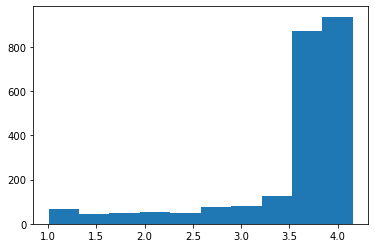

In [10]:
plt.hist(a[:,1])
plt.show